In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [2]:
data = pd.read_csv('/home/miro/Bachelor/BT/data/outputs/production_consumption.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35036 entries, 0 to 35035
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    35036 non-null  datetime64[ns]
 1   cons_radnice                 35036 non-null  float64       
 2   cons_zs_preislerova          35036 non-null  float64       
 3   cons_zs_komenskeho           35036 non-null  float64       
 4   cons_ms_preislerova          35036 non-null  float64       
 5   cons_ms_pod_homolkou         35036 non-null  float64       
 6   cons_ms_vrchlickeho          35036 non-null  float64       
 7   cons_dum_pro_duchodce        35036 non-null  float64       
 8   cons_ms_drasarova            35036 non-null  float64       
 9   cons_ms_tovarni              35036 non-null  float64       
 10  cons_ms_na_machovne          35036 non-null  float64       
 11  cons_zimni_stad              35036 non-nu

In [3]:
cons_columns = [col for col in data.columns if 'cons' in col]
prod_columns = [col for col in data.columns if 'prod' in col]

data['cons'] = data[cons_columns].sum(axis=1)
data['prod'] = data[prod_columns].sum(axis=1)

In [4]:
data['date'] = data['timestamp'].dt.date

In [5]:
def create_plots(data: pd.DataFrame, columns: List[str], title: str, window: int = 0):
    sum_prod_cons = data[['date'] + columns].groupby('date').sum()

    if window > 1:
        sum_prod_cons_smoothed = sum_prod_cons.rolling(window=window).mean()
    else:
        sum_prod_cons_smoothed = sum_prod_cons
    
    fig = plt.figure(figsize=(12, 8))
    for col in columns:
        label = f'{col} (smoothed)' if window > 1 else col
        plt.plot(sum_prod_cons_smoothed[col], label=label)
    plt.legend()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Energy (kWh)')
    plt.grid(True)
    plt.show()

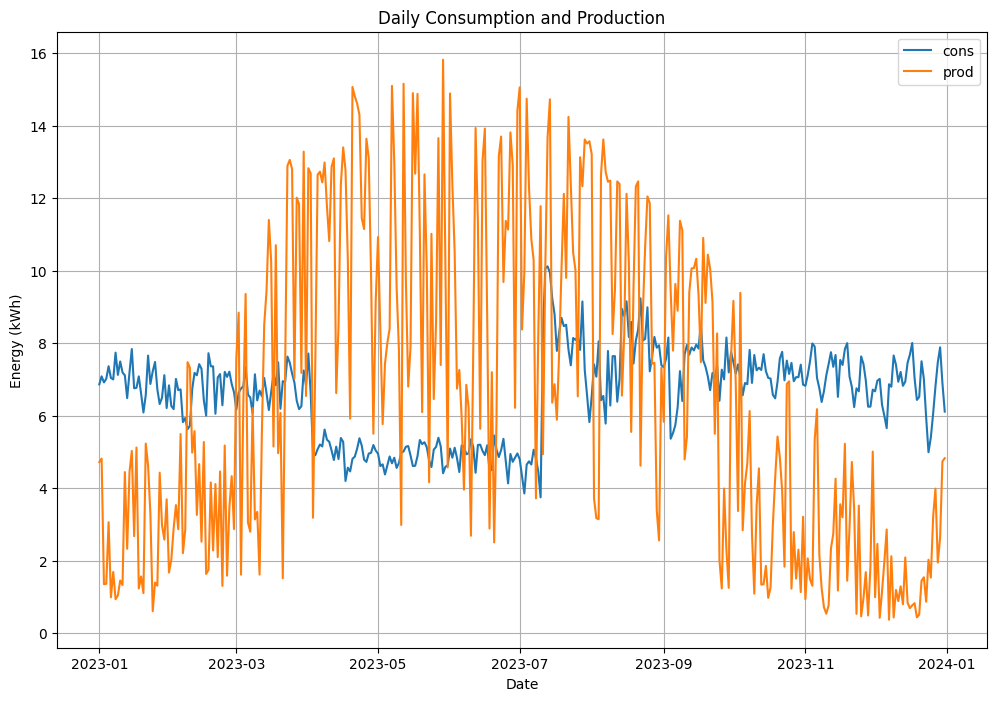

In [6]:
create_plots(data, ['cons', 'prod'], 'Daily Consumption and Production')

In [7]:
sum_prod_cons = data[['date', 'cons', 'prod']].groupby('date').sum()
sum_prod_cons.describe()

,cons,prod
count,365.000000,365.000000
mean,6.547114,6.618908
std,1.228132,4.407257
min,3.749510,0.372791
25%,5.330396,2.688246
50%,6.816960,5.888796
75%,7.400081,10.328810
max,10.119842,15.819438


### Comment

We can see, that in summer months there is higher production of energy and in the winter months is higher consumption, this is what we could have expected. We can also see that volatility of energy production is greater than volatility of consumption. We can see sudden shifts in consumptions of energy in April and July, let's plot energy consumption to see it more clearly.

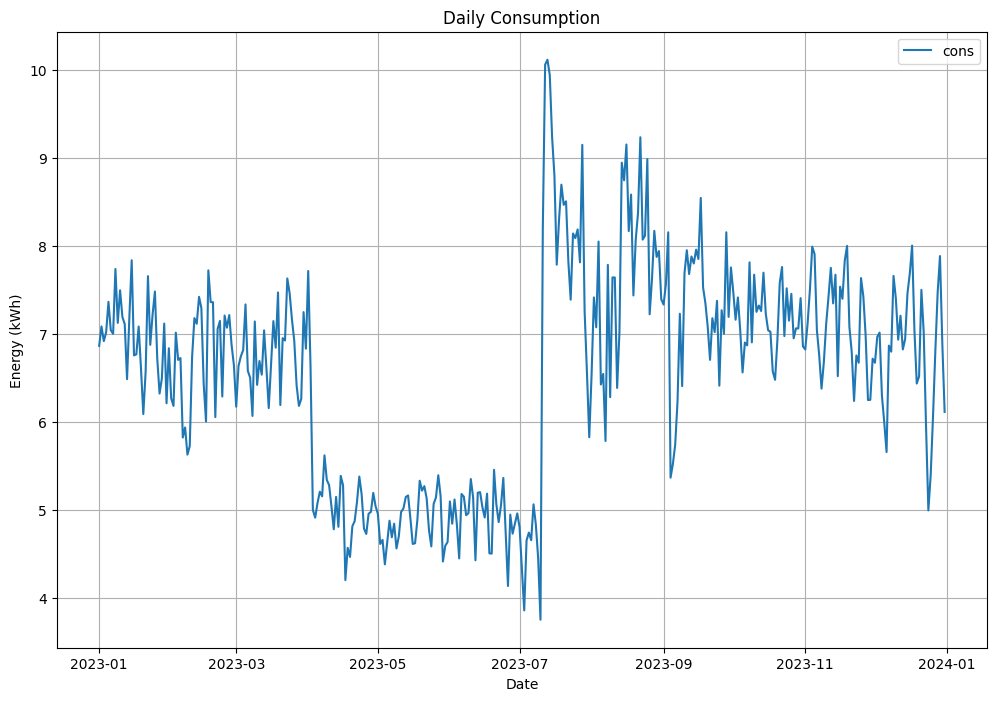

In [8]:
create_plots(data, ['cons'], 'Daily Consumption', window=0)

### Comment

These shifts are more clear now, these shifts are caused by the ice rink in the dataset. Let's look at the plot again without ice rink.

In [9]:
data.columns

Index(['timestamp', 'cons_radnice', 'cons_zs_preislerova',
       'cons_zs_komenskeho', 'cons_ms_preislerova', 'cons_ms_pod_homolkou',
       'cons_ms_vrchlickeho', 'cons_dum_pro_duchodce', 'cons_ms_drasarova',
       'cons_ms_tovarni', 'cons_ms_na_machovne', 'cons_zimni_stad',
       'cons_plavecky_areal', 'cons_parkovaci_dum',
       'prod_area_01_ms_vrchlickeho', 'prod_area_02_ms_vrchlickeho',
       'prod_area_03_ms_vrchlickeho', 'prod_total_ms_vrchlickeho',
       'prod_ms_machovne', 'prod_pristavba_preislerova', 'prod_parkovaci_dum',
       'prod_ms_preislerova', 'prod_ms_homolkou', 'prod_area_01_zs_komenskeho',
       'prod_area_02_zs_komenskeho', 'prod_total_zs_komenskeho',
       'prod_zs_preislerova', 'prod_area_01_zimni_stad',
       'prod_area_02_zimni_stad', 'prod_total_zimni_stad', 'prod_ms_drasarova',
       'Date', 'cons', 'prod', 'date'],
      dtype='object')

In [10]:
data['cons_without_rink'] = data[cons_columns].drop('cons_zimni_stad', axis=1).sum(axis=1)
data['cons_without_rink_and_pool'] = data[cons_columns].drop(['cons_zimni_stad', 'cons_plavecky_areal'], axis=1).sum(axis=1)
sum_prod_cons = data[['date', 'cons', 'prod', 'cons_without_rink', 'cons_without_rink_and_pool']].groupby('date').sum()

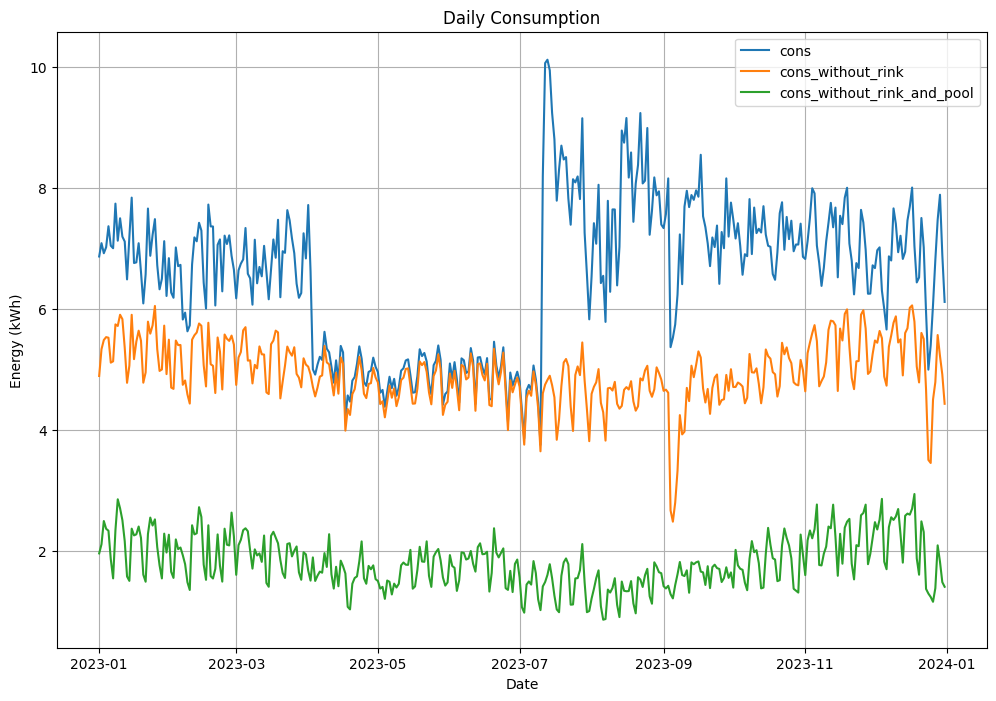

             cons        prod  cons_without_rink  cons_without_rink_and_pool
count  365.000000  365.000000         365.000000                  365.000000
mean     6.547114    6.618908           4.928304                    1.798756
std      1.228132    4.407257           0.517325                    0.421017
min      3.749510    0.372791           2.478501                    0.856368
25%      5.330396    2.688246           4.662254                    1.494127
50%      6.816960    5.888796           4.905711                    1.755745
75%      7.400081   10.328810           5.251697                    2.086743
max     10.119842   15.819438           6.056169                    2.935753


In [11]:
create_plots(data, ['cons', 'cons_without_rink', 'cons_without_rink_and_pool'], 'Daily Consumption', window=0)

print(sum_prod_cons.describe())

### Comment

This plot show that sudden shifts are indeed caused by ice rink consumption. Also volatility of consumption dropped. Now we can see sudden drops at the beginning of September and end of December which were caused by pool, we can suspect that in those days pool underwent closure.

In [12]:
# let's plot all the columns aggregated by day

elementary_schools = [col for col in cons_columns if 'zs' in col]
kindergardens = [col for col in cons_columns if 'ms' in col]
other = list(set(set(cons_columns) - (set(elementary_schools).union(set(kindergardens)))))

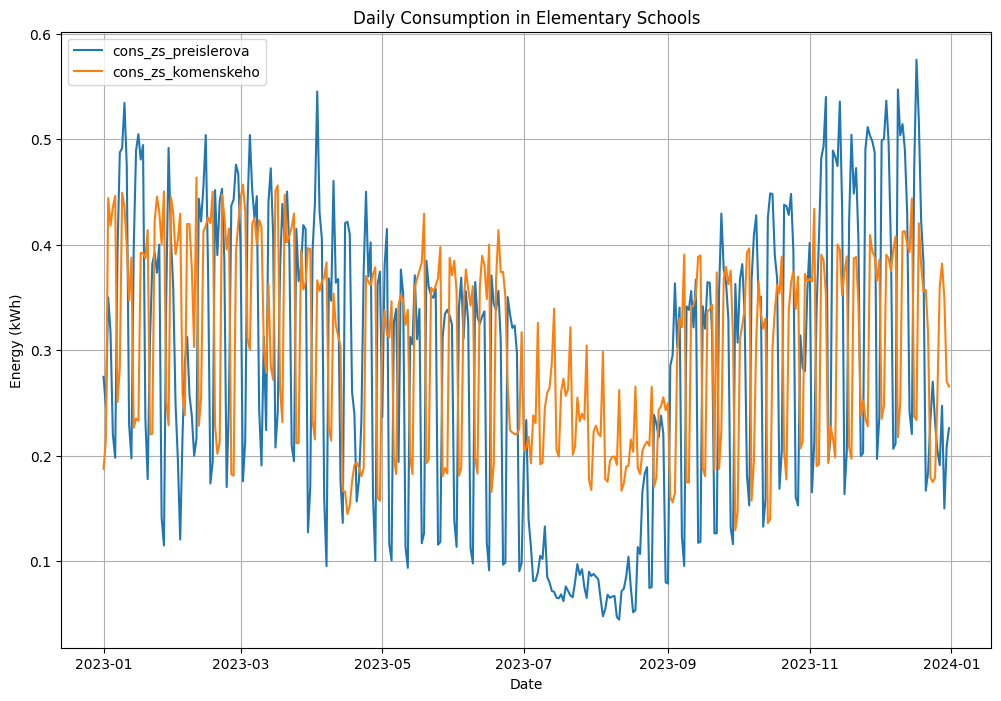

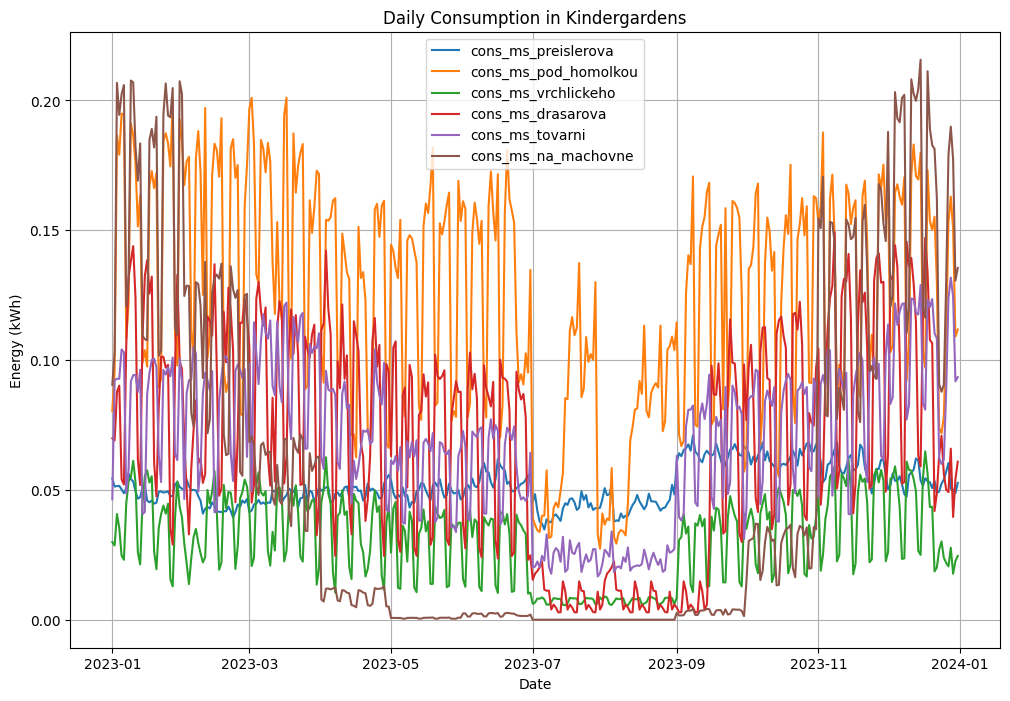

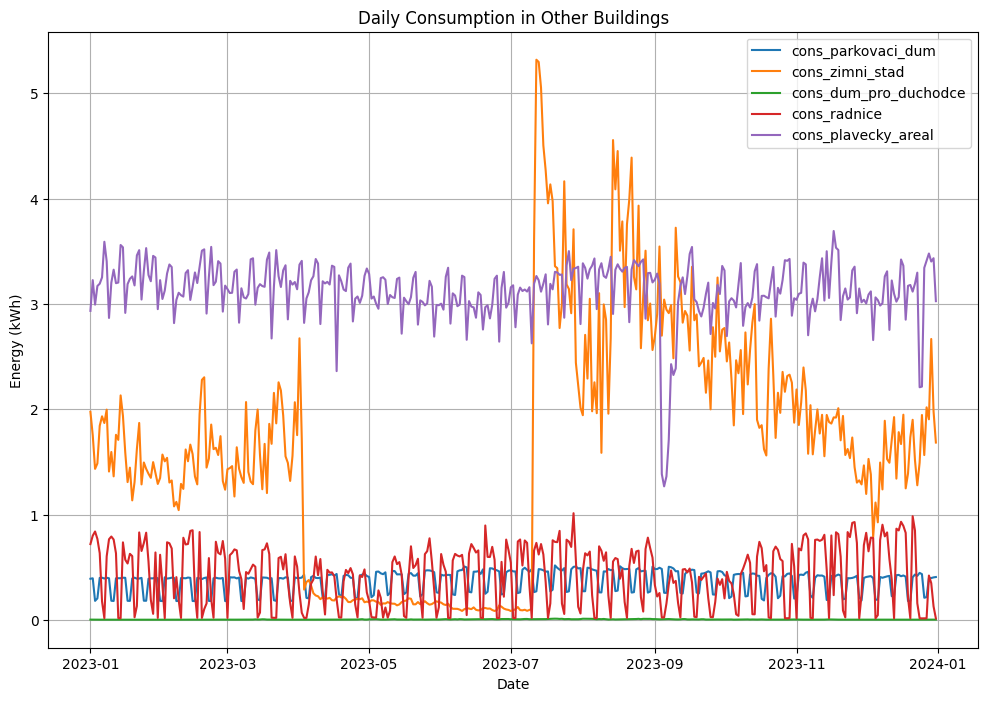

In [13]:
# plot lists

create_plots(data, elementary_schools, 'Daily Consumption in Elementary Schools', window=0)
create_plots(data, kindergardens, 'Daily Consumption in Kindergardens', window=0)
create_plots(data, other, 'Daily Consumption in Other Buildings', window=0)


### Comment

These plots look very messy, so I would like make some change to smooth them a little to see trends in data by incorporating 7-days moving average.

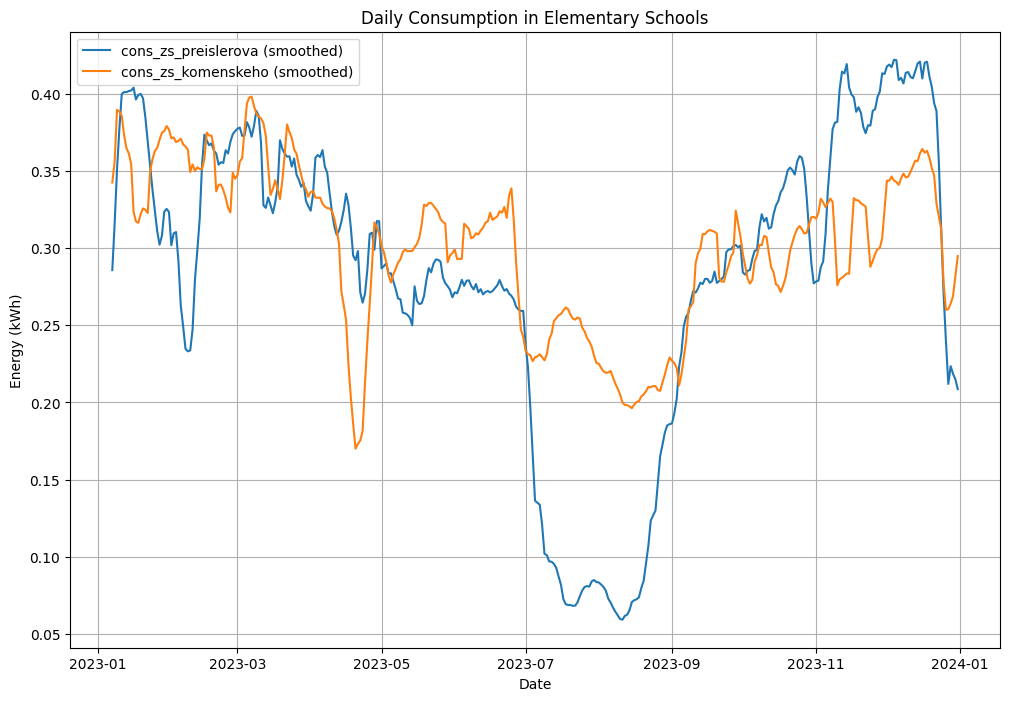

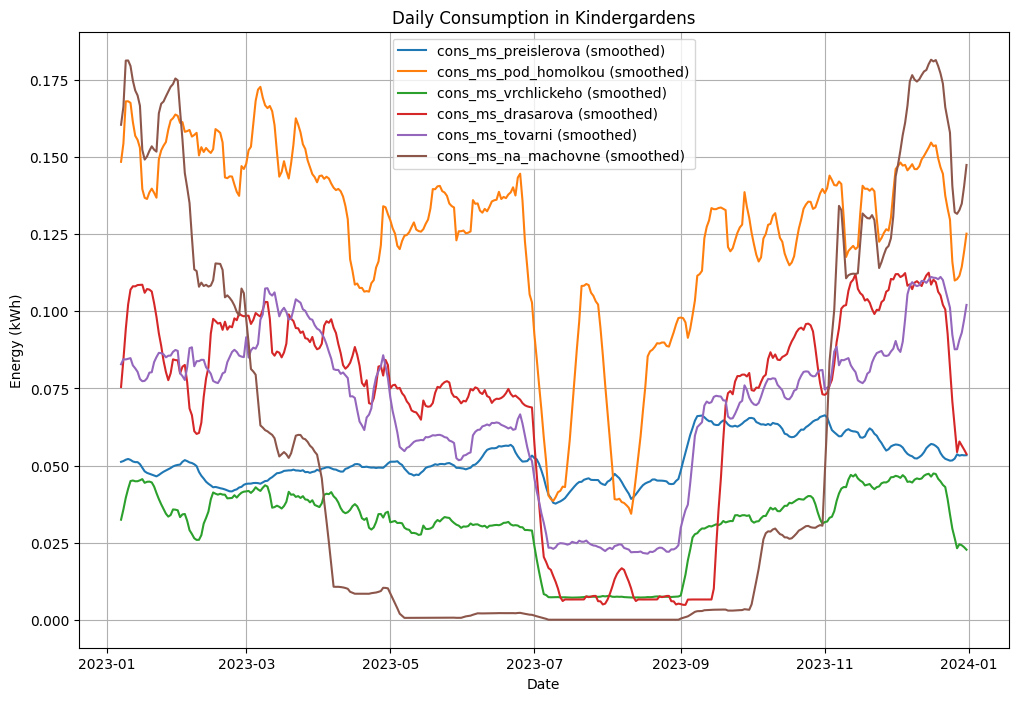

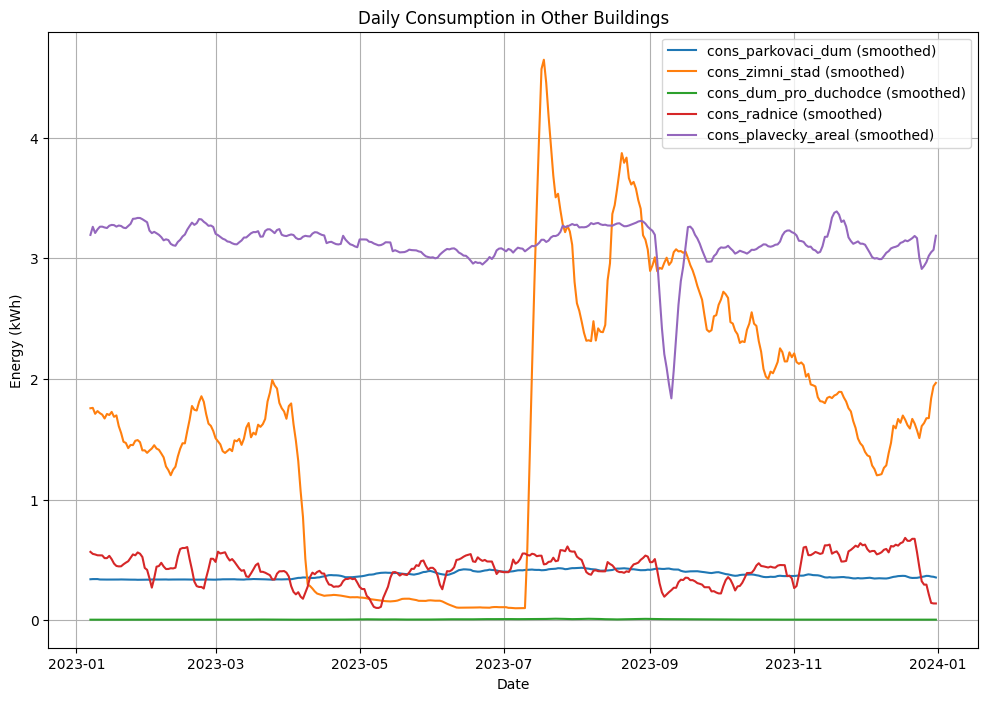

In [14]:
create_plots(data, elementary_schools, 'Daily Consumption in Elementary Schools', window=7)
create_plots(data, kindergardens, 'Daily Consumption in Kindergardens', window=7)
create_plots(data, other, 'Daily Consumption in Other Buildings', window=7)


In [15]:
data[cons_columns].sum().sort_values(ascending=False)

cons_plavecky_areal      1142.284992
cons_zimni_stad           590.865852
cons_radnice              156.667406
cons_parkovaci_dum        137.094354
cons_zs_komenskeho        110.044915
cons_zs_preislerova       103.597292
cons_ms_pod_homolkou       45.643787
cons_ms_tovarni            25.399443
cons_ms_drasarova          25.392220
cons_ms_na_machovne        20.139822
cons_ms_preislerova        18.901163
cons_ms_vrchlickeho        11.326448
cons_dum_pro_duchodce       2.338974
dtype: float64

In [16]:
data[cons_columns].var().sort_values(ascending=False)

cons_zimni_stad          3.431370e-04
cons_plavecky_areal      9.241058e-05
cons_radnice             3.485394e-05
cons_zs_preislerova      9.626975e-06
cons_parkovaci_dum       3.312930e-06
cons_zs_komenskeho       2.829429e-06
cons_ms_drasarova        8.165439e-07
cons_ms_pod_homolkou     7.032048e-07
cons_ms_na_machovne      6.059227e-07
cons_ms_tovarni          1.796422e-07
cons_ms_vrchlickeho      1.312125e-07
cons_ms_preislerova      2.329570e-08
cons_dum_pro_duchodce    1.902447e-09
dtype: float64

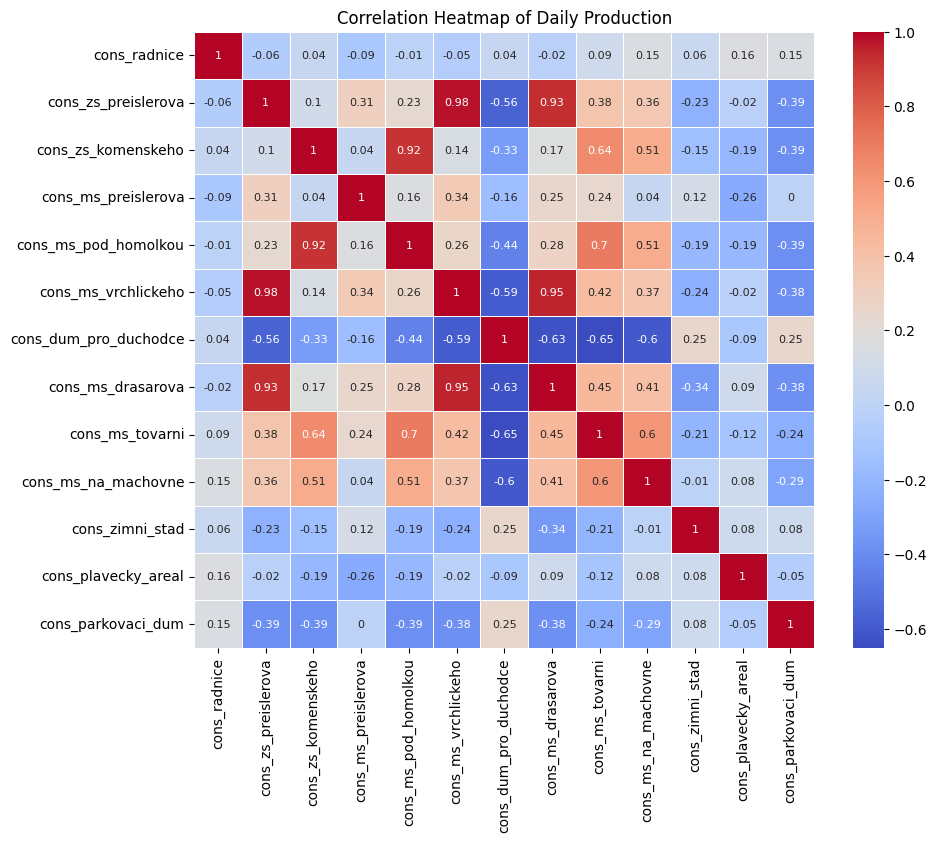

In [17]:
daily_consumption = data[['date'] + cons_columns].groupby('date').sum()
corr_df = daily_consumption.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap of Daily Production')
plt.show()

### Conclusions from performed data analysis

1. The biggest energy consumers are Swimming pool and Ice rink
    - Ice rink have a large shifts in energy consumption mainly due to hockey season.
    - Pool have sudden shift during its closure.
2. Schools also cut down usage of energy in summer.
3. We can see that on the weekends there is lower energy consumption in schools and parking house.
    - This is just observation from a plots, so if needed we should use some kind of statistical test
4. A few significant correlations can be observed. Notably, there are schools and kindergartens where a high correlation is logical.

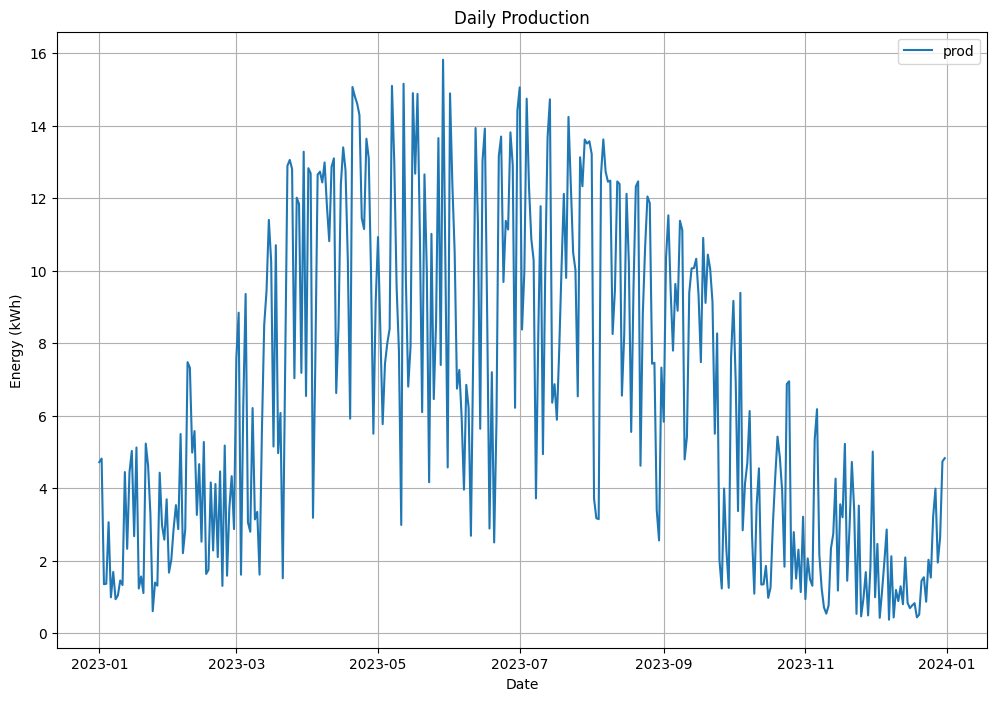

In [18]:
create_plots(data, ['prod'], 'Daily Production', window=0)

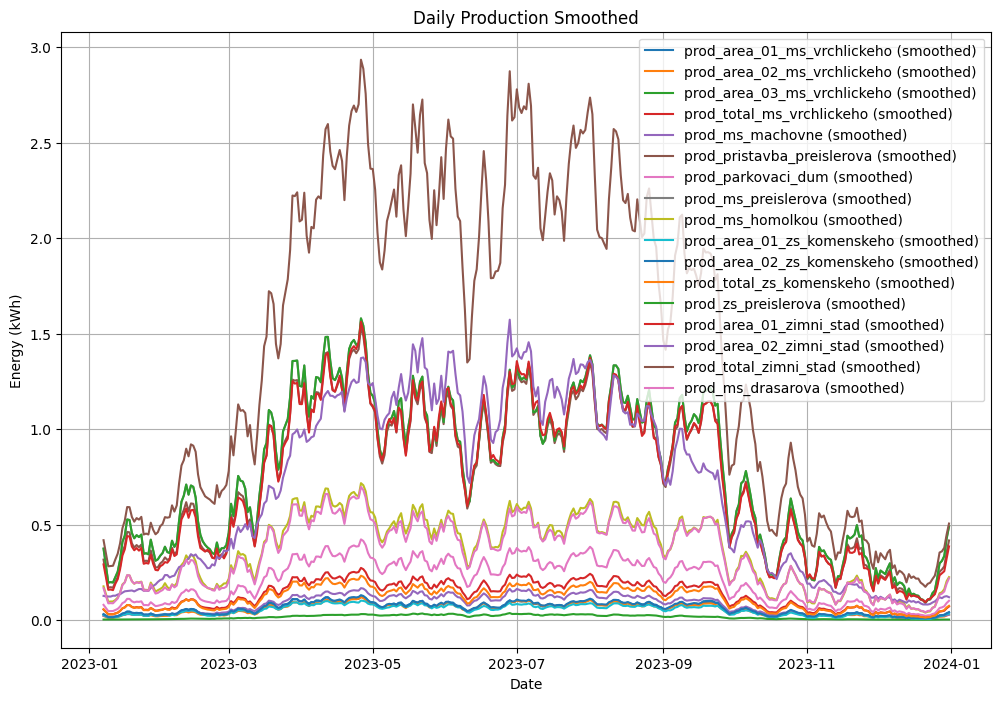

In [19]:
create_plots(data, prod_columns, 'Daily Production Smoothed', window=7)

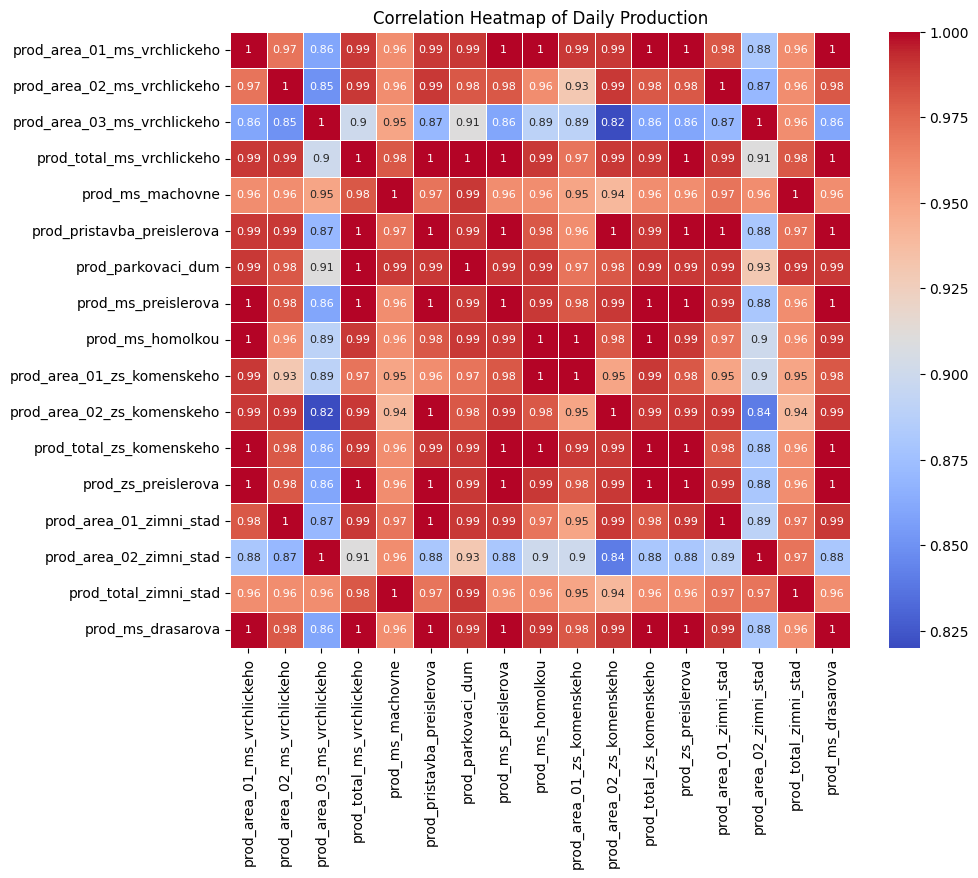

In [20]:
daily_production = data[['date'] + prod_columns].groupby('date').sum()
daily_production.corr()
corr_df = daily_production.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap of Daily Production')
plt.show()

### Conclusion

1. High volatility in production data.
2. Very high correlation
   - This leads to further analysis of weather data.